# Logistic Regression and Loss Function Intuition

This notebook introduces the intuitions around the cost function used before for Linear Regression and a new function defines for Logistic Regression as the former proves not to be the best fit of a cost function 'J'.

It aims at graphically providing an initial understanding of this fact.

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import importlib

# Custom scripts imports
# Adding the directory to sys.path
sys.path.insert(0, os.path.abspath('../'))

# Import the modules after
from src.visualization import visualize
from src.models import predict_model

# Now reload using the module reference, for future changes.
importlib.reload(visualize)
importlib.reload(predict_model)

# Now, import the function from the reloaded module
from src.visualization.visualize import plt_simple_example, plt_two_logistic_curves_loss#, plt_logistic_cost
from src.visualization.visualize import plt_logistic_squared_error_cost, convex_bowl_shaped
from src.models.predict_model import sigmoid

For Linear Regression with multiple features, the cost function is plotted as a bowl-shaped 3D shape, as follows

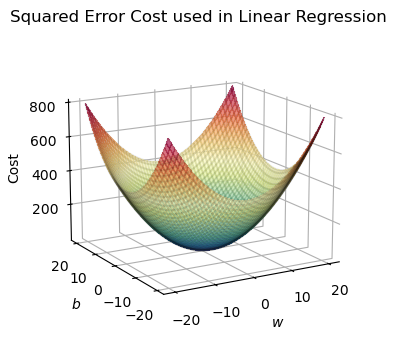

In [15]:
convex_bowl_shaped()

It could be tempting to try and use this cost function for Logistic Regression. **However, this algorithm presents a non-linear component when it comes to cost.** Particularly, the ***sigmoid*** function, which has the following formula:

$f_{w,b}(x^{(i)}) = sigmoid(wx^{(i)} + b )$

We can try using the LR cost function and plot it, to draw some conclusions:

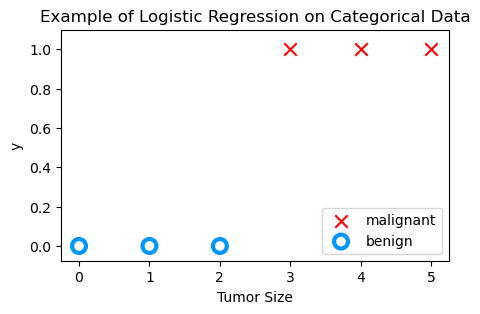

In [24]:
x_train = np.array([0., 1, 2, 3, 4, 5], dtype=np.longdouble)
y_train = np.array([0, 0, 0, 1, 1, 1], dtype=np.longdouble)
plt_simple_example(x_train, y_train)

For both the array of training samples and target values, we can try and apply the cost function J, defined as:

  $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 $$ 
 
where 
  $$f_{w,b}(x^{(i)}) = sigmoid(wx^{(i)} + b )$$

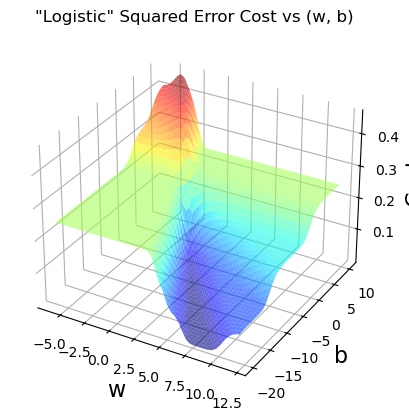

In [27]:
# Close previous plots
plt.close('all')
# Plot sigmoid using Liner Regression J's cost function
plt_logistic_squared_error_cost(x_train, y_train)

This plot actually shows that the cost function for LR, when applied to Logistic Regression, indeed creates more than one local minimum; or rather, it creates local minima. A different, purposely implemented, function for logistic regression is a better fit for this.

## Logistic Loss Function

Before defining the function is important to clarify some terms, as follows:

- **Loss** is a measure of the difference **of a single example** to its target value while the
- **Cost** is a measure of the losses **over the training set**

With these definitions in mind, we can then consider:

* $loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$ is the cost for a single data point, which is:

\begin{equation}
  loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = \begin{cases}
    - \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) & \text{if $y^{(i)}=1$}\\
    - \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) & \text{if $y^{(i)}=0$}
  \end{cases}
\end{equation}


*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target value.

*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot\mathbf{x}^{(i)}+b)$ where function $g$ is the sigmoid function.

The defining feature of this loss function is the fact that it uses two separate curves. One for the case when the target is zero or ($y=0$) and another for when the target is one ($y=1$). 

**Combined, these curves provide the behavior useful for a loss function**, namely, being zero when the prediction matches the target and rapidly increasing in value as the prediction differs from the target. Consider the curves below:

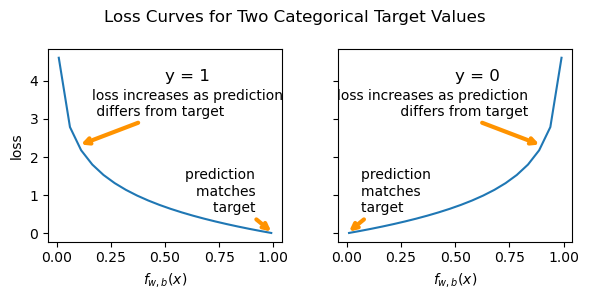

In [33]:
plt_two_logistic_curves_loss()

Combined, the curves are similar to the quadratic curve of the squared error loss (or bowl-shaped 3D shape, if using multiple features). It is also worth noting, the x-axis is $f_{\mathbf{w},b}$ which is the output of a sigmoid. The sigmoid output is strictly between 0 and 1.

With this information as foundation, the cost function can then be derived from it. (other notebook on the /notebook folder)